In [61]:
from scipy.stats import pearsonr, entropy
import numpy as np
import pandas as pd
import seaborn as sns
import akshare as ak
import baostock as bs
from utils import get_index_components, get_csindex_components, get_history_k
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',100)

In [401]:
## 创业板：sz.399006
## 中证红利: sh.000922
## 沪深300：sh.000300
data = get_history_k(['sh.600900'], stt_date='2020-01-01', end_date='2024-12-31', adjust='3')
data['weekday'] = (data['date'].dt.weekday+1).astype(str)
data

login success!
logout success!


,date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pct_chg,pe_ttm,ps_ttm,pcf_ncf_ttm,pb_mrq,is_st,weekday
0,2020-01-02,sh.600900,18.46,18.60,18.39,18.47,18.38,19128492.0,3.537703e+08,3,0.0869,1,0.4897,18.042559,8.089184,-679.829870,2.798927,0,4
1,2020-01-03,sh.600900,18.50,18.65,18.45,18.57,18.47,15438377.0,2.865621e+08,3,0.0702,1,0.5414,18.140245,8.132981,-683.510595,2.814081,0,5
2,2020-01-06,sh.600900,18.54,18.61,18.05,18.20,18.57,41550582.0,7.579218e+08,3,0.1889,1,-1.9925,17.778808,7.970934,-669.891913,2.758011,0,1
3,2020-01-07,sh.600900,18.22,18.26,18.10,18.19,18.20,23210668.0,4.214574e+08,3,0.1055,1,-0.0549,17.769039,7.966555,-669.523841,2.756496,0,2
4,2020-01-08,sh.600900,18.08,18.17,17.99,18.05,18.19,26440991.0,4.768796e+08,3,0.1202,1,-0.7697,17.632279,7.905240,-664.370826,2.735280,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,2024-11-28,sh.600900,27.37,27.48,27.17,27.43,27.39,69160630.0,1.892727e+09,3,0.2881,1,0.1460,19.892183,7.751306,-511.542934,3.189298,0,4
1189,2024-11-29,sh.600900,27.44,27.70,27.30,27.32,27.43,109026420.0,2.998566e+09,3,0.4541,1,-0.4010,19.812411,7.720221,-509.491541,3.176508,0,5
1190,2024-12-02,sh.600900,27.39,27.71,27.30,27.61,27.32,88629895.0,2.442141e+09,3,0.3692,1,1.0615,20.022719,7.802171,-514.899760,3.210227,0,1
1191,2024-12-03,sh.600900,27.62,28.10,27.54,27.95,27.61,134347559.0,3.742683e+09,3,0.5596,1,1.2314,20.269286,7.898250,-521.240431,3.249759,0,2


In [387]:
target_weekday = '5'
stt_date = '2024-01-01'
end_date = '2024-09-15'
(data.query(f"weekday=='{target_weekday}' and date>='{stt_date}' and date<='{end_date}'")['pct_chg']/100+1).prod()


0.9007008739979198

<Axes: xlabel='pct_chg', ylabel='Count'>

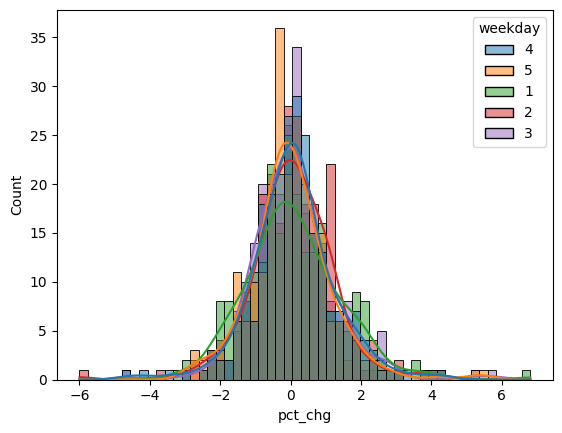

In [402]:
sns.histplot(data=data, x="pct_chg", hue="weekday", kde=True)

<Axes: >

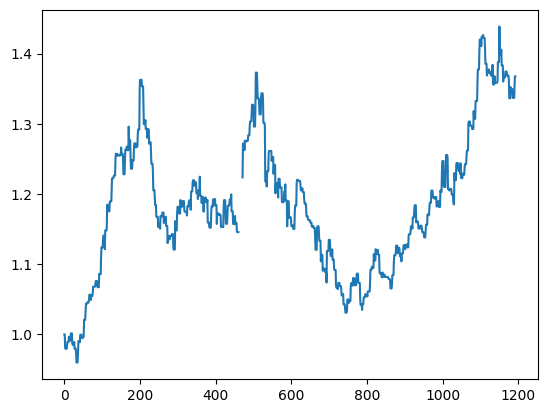

In [413]:
data['position'] = 0
data.loc[data['weekday'].isin(['1','2']),'position'] = 1
data['return_factor'] = (data['pct_chg']*data['position'])/100+1
data.query("date>='2020-01-01' and date<='2024-12-15'")['return_factor'].cumprod().plot()


In [52]:
df[df['股票代码']=='600889']

,序号,股票代码,股票简称,持有基金家数,持股总数,持股市值,持股变化,持股变动数值,持股变动比例
107,108,600889,南京化纤,3,3921660,22627978.2,增仓,1780860,83.19


<Axes: >

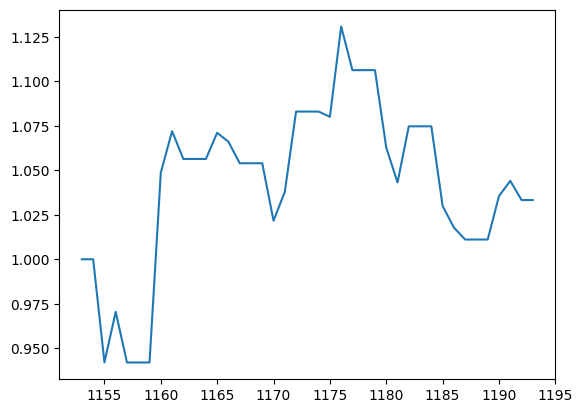

In [452]:
data = ak.stock_zh_index_daily_em('sh000688')
# data = ak.stock_zh_index_daily_em('sh000300')
# data =ak.stock_zh_index_daily_em('sz399006')
data['weekday'] = (data['date'].astype("datetime64[ns]").dt.weekday+1).astype(str)
data['pct_chg'] = ((data['close']/data['close'].shift(1)).fillna(1)-1)*100


data['position'] = 0
data.loc[data['weekday'].isin(['1','2'I ]),'position'] = 1
data['return_factor'] = (data['pct_chg']*data['position'])/100+1
data[data['date']>='2024-10-09']['return_factor'].cumprod().plot()


<Axes: xlabel='pct_chg', ylabel='Count'>

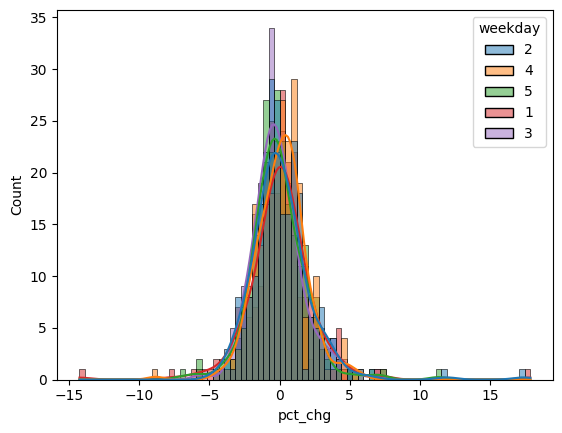

In [305]:
sns.histplot(data=data, x="pct_chg", hue="weekday", kde=True)

In [37]:
ak.stock_institute_hold_detail('600889','20231')


,持股机构类型,持股机构代码,持股机构简称,持股机构全称,持股数,最新持股数,持股比例,最新持股比例,占流通股比例,最新占流通股比例,持股比例增幅,占流通股比例增幅
0,基金,004685,金元顺安元启灵活配置混合,金元顺安元启灵活配置混合,256.39,245.86,0.70,0.67,0.70,0.67,0.03,0.03
1,基金,007994,华夏中证500指数增强A,华夏中证500指数增强A,242.47,0.00,0.66,0.00,0.66,0.00,0.66,0.66
2,基金,013233,华夏中证500指数智选增强A,华夏中证500指数智选增强A,208.69,0.00,0.57,0.00,0.57,0.00,0.57,0.57
3,基金,360001,光大保德信量化股票A,光大保德信量化股票A,179.72,165.02,0.49,0.45,0.49,0.45,0.04,0.04


In [14]:
?ak.stock_institute_hold_detail


Signature:
ak.stock_institute_hold_detail(
    stock: str = '600433',
    quarter: str = '20201',
) -> pandas.core.frame.DataFrame
Docstring:
新浪财经-股票-机构持股详情
https://vip.stock.finance.sina.com.cn/q/go.php/vComStockHold/kind/jgcg/index.phtml
:param stock: 股票代码
:type stock: str
:param quarter: 从 2005 年开始, {"一季报":1, "中报":2 "三季报":3 "年报":4}, e.g., "20191", 其中的 1 表示一季报; "20193", 其中的 3 表示三季报;
:type quarter: str
:return: 指定股票和财报时间的机构持股数据
:rtype: pandas.DataFrame
File:      ~/miniconda3/envs/quant_env/lib/python3.8/site-packages/akshare/stock_fundamental/stock_hold.py
Type:      function